## Лаба1
## Варіант 4 
## Задача 2)
$g(y)=y^2+y-6$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.lines as mlines

def f(t,y):
    return y**2+y-6

# 2.1)
Зобразити векторне поле в точках $0 \pm 1 \pm 2 \pm 3 \pm 4$

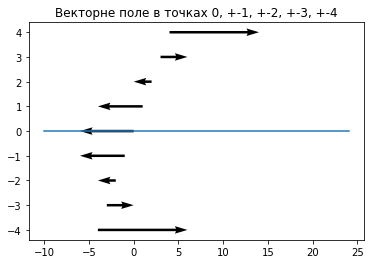

In [2]:
y = np.arange(-4, 5, 1)
vectors = f(0, y)


x = np.arange(-10, 25)
plt.title('Векторне поле в точках 0, +-1, +-2, +-3, +-4')
plt.plot(x, np.zeros_like(x))
plt.quiver(y, y, vectors - y, np.zeros_like(vectors), angles='xy', scale_units='xy', scale=1)

plt.show()

In [3]:
def plotdf(f, xran=[-10, 10], yran=[-10, 10], grid=[20, 20], color='k', pivot='mid'):
    """
    Допоміжна функція для зображення поля напрямків
    """
    x = np.linspace(xran[0], xran[1], grid[0])
    y = np.linspace(yran[0], yran[1], grid[1])
    def dX_dt(X, Y, t=0): return map(eval, f)
    
    X , Y  = np.meshgrid(x, y)  
    DX, DY = dX_dt(X, Y)        
    M = (np.hypot(DX, DY))      
    M[ M == 0] = 1.         
    DX = DX/M                   
    DY = DY/M  
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.quiver(X, Y, DX, DY, pivot=pivot, color=color)
    plt.xlim(xran), plt.ylim(yran)
    plt.grid(True)

## 2.2) Інтегральні криві рівняння

C:\anaconda\lib\site-packages\scipy\integrate\_ode.py:1009: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


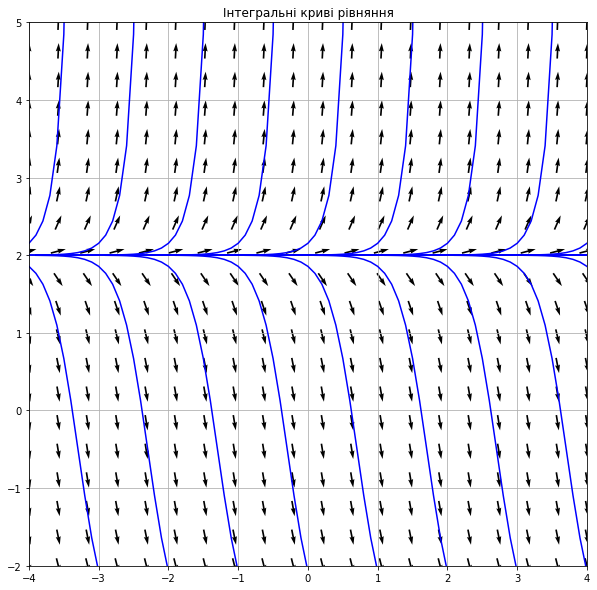

In [4]:
from scipy.integrate import ode

r = ode(f)
for j in [-3,-2,-2.99,2,2.001,1.999]:
    for i in np.arange(-6,4,1):
        r.set_initial_value(j,i)
        t1 = 10
        dt = 0.1
        x = []
        y = []
        while r.successful() and r.t < t1:
            x.append(r.t+dt)
            y.append(r.integrate(r.t+dt))
        plt.plot(x,y,'b')
plotdf(["1","Y**2+Y-6"], xran=[-4, 4], yran=[-2, 5])
plt.title("Інтегральні криві рівняння")
plt.show()

# 2.2) Розв'язки визначені на 	$\mathbb{R}$ та Множина точок перегину

In [5]:
print("Розв`язки визначені на R:",list(np.roots([1,1,-6])))
print("Множина точок перегину ",list(np.roots([1,1,-6]))+list(np.roots([1,-1])))

Розв`язки визначені на R: [-3.0, 2.0]
Множина точок перегину  [-3.0, 2.0, 1.0]


## 2.3) Нехай - $y(x,y_0),x \in I_{y_0}$непродовжуваний розв'язок рівняння такий, що $y(0,y_0)=y_0$. Знайти явний вид інтегралу $I_{y_0}$.

$$y'=y^2+y-6$$
$$\frac{y'}{y^2+y-6}=1$$
$$\int \frac{y'}{y^2+y-6}dx=\int 1dx+c$$
$$\int \frac{y'}{y^2+y-6}dx=ln\frac{y-2}{y+3}$$
$$\frac{y-2}{y+3}=e^{x+c} \Rightarrow y=-3+\frac{5}{3-ce^x}$$

$$\left\{ \begin{array}{cc} y(x,y_0)=-3+\frac{5}{3-e^{x}\frac{y_0-2}{y_0+3}}; & y_0=-3, y\equiv 2, y\equiv -3 \\
                              y \equiv -3; & I(x,y)
          \end{array}\right.$$ 
          
$$e^{x} = \frac{y_0+3}{y_0-2}; y_0 \ne 2\  (y_0=2, y\equiv 2 \Rightarrow I_2=\mathbb{R})$$

#### Дослідження
$$1) \frac{y_0+3}{y_0-2}<0\ \Rightarrow y \in [-3,2]\ \Rightarrow\ I_{y_0}=\mathbb{R}$$
$$2) \frac{y_0+3}{y_0-2}>0\ \Rightarrow y \in (-\infty;-3)\cup(2;+\infty) \Rightarrow x_0=\ln\frac{y_0+3}{y_0-2}=ln(1+\frac{5}{y_0-2}) $$
$$y_0\in (-\infty;-3) \Rightarrow y_0-2<-3<0 \Rightarrow \frac{1}{y_0-2}<0 \Rightarrow \frac{5}{y_0-2}+1<1 \Rightarrow x_0<0 \Rightarrow I_{y_0}=(x_0;+\infty)$$
$$y_0 in (2;=\infty) \Rightarrow y_0-2>0 \Rightarrow 1+\frac{5}{y_0-2}>1 \Rightarrow x_0>0 \Rightarrow I_{y_0}=(-\infty;x_0)$$

#### Таким чином:

$$ I_{y_0}\left\{ \begin{array}{cc}
            \left ( ln\frac{y_0+3}{y_0-2};+\infty \right ), & y_0 \in (-\infty;-3)\\
            \mathbb{R}; & y_0 [-3;1]\\
            \left (-\infty;ln\frac{y_0+3}{y_0-2} \right ), & y_0 \in (2;+\infty)
           \end{array}\right.$$
           
### 2.4)
$$ x>\ln\frac{y_0+3}{y_0-2} \iff \frac{y_0+3}{y_0-2}<e^{x} \iff y_0>\frac{-3-2e^{x}}{1-e^{x}} \Rightarrow \forall x>0\  g(x)\ not\ defined\ y_0>\frac{-2e^{x}-3}{1-e^{x}} $$
### 2.5)
$$H=(-\infty;2]$$

### 2.6)
$$y_0=2; y_0=-3$$




## Задача 1) $y'=y^2-3y-x+2$

In [7]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy
%matplotlib inline


def f(t,y):
    return y**2-3*y-x+2

In [8]:
def task_f(x, y):
    """  f(x, y) = y^2 - 3y + x + 2 in y' = f(x, y)
    """
    return y**2 - 3*y - x + 2

def task_f2(y, x):
    """  f(x, y) = y^2 - 3y + x + 2 in y' = f(x, y)
    
   Значення x і y помінялися місцями, щоб використовувати цю функцію як параметр 'odeint'   
   """
    return y**2 - 3*y - x + 2

### 3.1) Поле напрямків

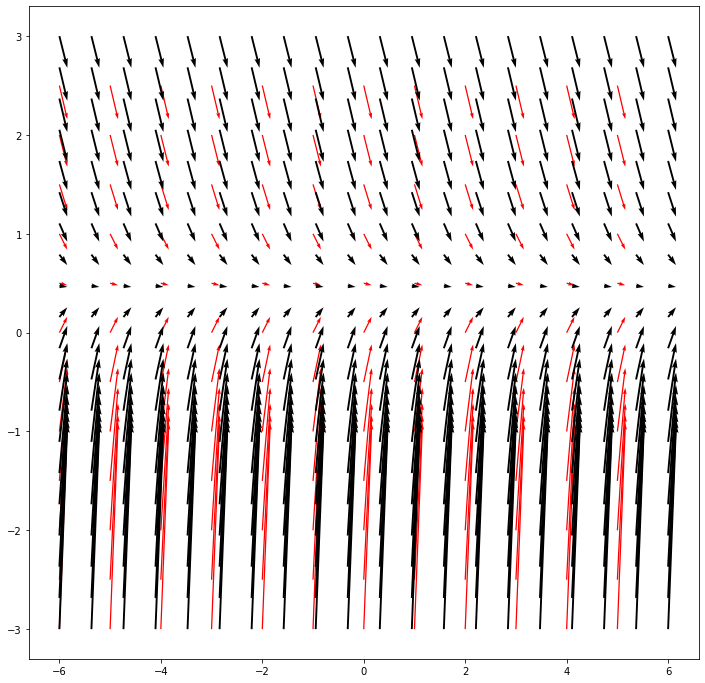

In [9]:
fig = plt.figure(figsize=(12, 12))       

# ------------------------------ будуємо поле напрямків-----------------------------
X, Y = np.meshgrid(np.arange(-6, 6), np.arange(-6, 6) / 2)

X = np.arange(-6, 6)
Y = np.arange(-6, 6) / 2

U = [1 for _ in range(len(X))]
V = task_f(X, Y)

XX, YY = np.meshgrid(X, Y)
UU, VV = np.meshgrid(U, V)

plt.quiver(XX, YY, UU, VV, color='red', units='xy', width=0.02, scale=8)

# ---------------------------------------------------------------------------------------
X = np.linspace(-6, 6, 20)
Y = np.linspace(-3, 3, 20)

U = [1 for _ in range(20)]
V = task_f(X, Y)

XX, YY = np.meshgrid(X, Y)
UU, VV = np.meshgrid(U, V)

plt.quiver(XX, YY, UU, VV, units='xy', width=0.03, scale=8)


plt.show()


### 2)Описати аналітично та зобразити множини точок максимуму розв"язків
### Для опису всіх максимумів треба вирішити рівняння  з умовою: $$y' = f(x, y) = 0,\quad  y'' = f'_x + f'_y f \le 0$$$$y^2 - 3y -x+2 = 0, \quad   -1 + (2y - 3)(y^2 - 3y - x + 2) \le 0$$$$y = \frac{3\pm \sqrt{1 + 4x}}{2}, \quad  x \le \frac{2y^3 - 9y^2 + 13y - 7}{2y - 3} \quad (1)$$

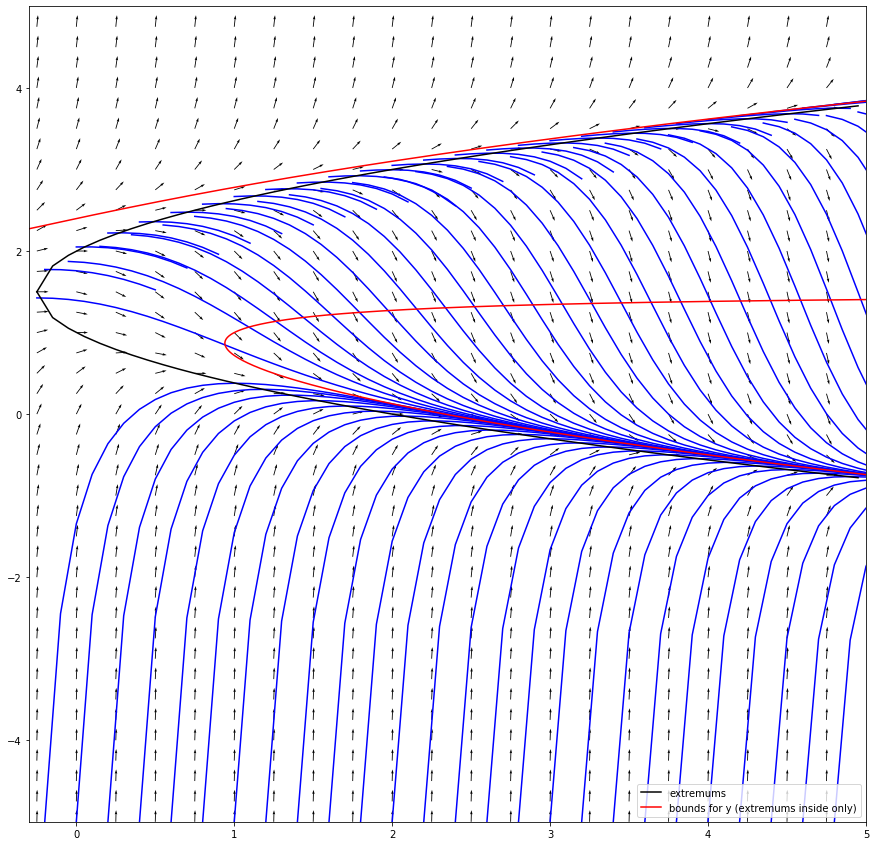

In [10]:
import numpy as np
def bound(y):
    return (2*y**3 - 9*y**2 + 13*y - 7) / (2*y - 3)

array = np.arange(-5, 5, 0.25)

# ------------------------------ побудова поля напрямків -----------------------------
XX, YY = np.meshgrid(array, array)

UU = np.cos(np.arctan(task_f(XX, YY)))   # задаємо коорд. x і y для кожного вектора як  cos і sin
VV = np.sin(np.arctan(task_f(XX, YY)))   # щоб отримати вектори одиничної довжини
fig = plt.figure(figsize=(15, 15))    

plt.ylim(-5, 5)   # встановлюємо границю площини
plt.xlim(-0.3, 5)
plt.quiver(XX, YY, UU, VV, width=0.001)

# -------------------------- побудова розв"язку між особливими точками  -----------------------------
arr1 = np.arange(-0.25, 6, 0.2)  

# верхня парабола (існує нескінченна к-сть розвязків,які збігаються з цією параболою,
# тому ми не можемо знайти ні одного роз"язку числовим методом з цих точок )
arr2 = (2.85 + np.sqrt(1 + 4* arr1))/2   # таким чином початкоі стани повинні бути трохи нижче ніж параболі
for (x0, y0) in zip(arr1, arr2):    
    x = np.arange(x0, 6, 0.1)    # параметри підібрані методом спроб та помилок
    plt.plot(x, odeint(task_f2, y0, x), color='b')

arr1 = np.arange(-0.2, 5, 0.2)
# таким же чином початкові стани повинні бути трохи більшими, ніж парабола
arr2 = (3.1 + np.sqrt(1 + 4*arr1))/2 
for (x0, y0) in zip(arr1, arr2):
    x = np.arange(x0, x0 + 0.8, 0.1)
    plt.plot(x, odeint(task_f2, y0, x), color='b')


# ------------------------- побудова рішень нижче спеціальних точок --------------------------------
arr1 = np.arange(-0.2, 5, 0.2)
# print(arr1)
for x0 in arr1:
    x = np.arange(x0, x0 + 3, 0.1)
    plt.plot(x, odeint(task_f2, -5, x), color='b')
# ------------------------------ побудова графіків кривих екстремумів --------------------------------------
x = np.arange(-0.25, 5, 0.1)

plt.plot (x, (3 + np.sqrt(1 + 4* x))/2 , color='black', label='extremums')
plt.plot (x, (3 - np.sqrt(1 + 4* x))/2, color='black')
# ------------------------------ побудова меж з (1) ------------------------------------------
y = np.arange(-1, 1.499, 0.001)
plt.plot(bound(y), y, color='red', label='bounds for y (extremums inside only)')

y = np.arange(1.501, 5, 0.001)
plt.plot(bound(y), y, color='red')
plt.legend(loc=4)
plt.show()

### 3) та 4) зобразити ізокліни з коефіцієнтом кута: $ k = \pm{1/2}, \pm{1}, \pm{3} $ та напрямним полем у випадкових точках кожного ізокліну¶
Ізокліни описуються рівнянням $f(x, y) = k$. 

$$k = y^2 - 3y - x + 2 \Rightarrow x = y^2 - 3y + 2 - k$$

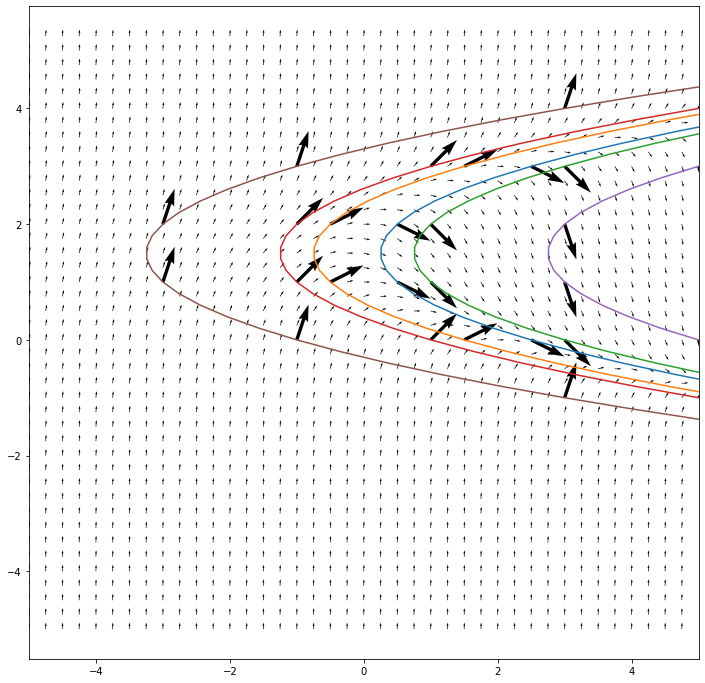

In [11]:
array = np.arange(-5, 5.5, 0.25)

fig = plt.figure(figsize=(12, 12))
plt.xlim(-5, 5)

# ------------------------------ будуємо поле напрямків -----------------------------
XX, YY = np.meshgrid(np.arange(-14, 5, 0.25), array)

UU = np.cos(np.arctan(task_f(XX, YY)))   # задаємо коорд. x і y для кожного вектора як  cos і sin   
VV = np.sin(np.arctan(task_f(XX, YY)))   # щоб отримати вектори одиничної довжини

plt.quiver(XX, YY, UU, VV, width=0.001)

# -------------------------------- будуємо ізокліни ----------------------------------
k = [-(1/2), (1/2),-1 , 1, -3, 3]   # коефіцієнти

y = np.arange(-3, 5, 0.2)   
for tmp_k in k:
    x = y**2 - 3*y + 2 - tmp_k
    plt.plot(x, y)
    
# --------------------------- будуємо поля напрямків для ізокліна ----------------------\\
y = np.arange(-3, 5)       
for tmp_k in k:
    x = y**2 - 3*y + 2 - tmp_k
    U = 1
    V = task_f(x, y)
    plt.quiver(x, y, U, V, width=0.005)
plt.show()


### 5)Області зростання і спадання
y зростає $\Leftrightarrow  y' \ge 0 \Rightarrow f(x, y) \ge 0$

$$y \ge \frac{3 + \sqrt{1 + 4x}}{2},\, or\, y \le \frac{3 - \sqrt{1 + 4x}}{2}, \, x \in [-\infty, 1/4] \, (*)$$
Таким чином, зростатиме $\Leftrightarrow$ $y$ та $x$ буде задовільняти нерівність $(*)$ or $x > 1/4 $¶


C:\anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
C:\anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


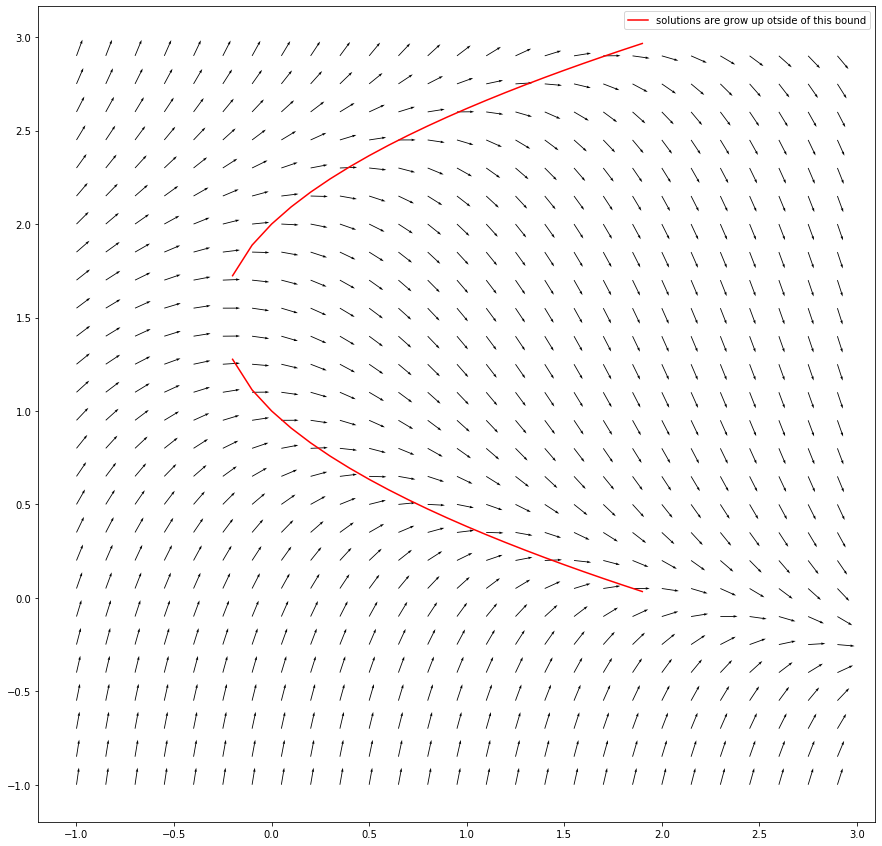

In [12]:
array = np.arange(-1, 3, 0.15)

# ------------------------------ будуємо поле напрямків -----------------------------
XX, YY = np.meshgrid(array, array)
UU = np.cos(np.arctan(task_f(XX, YY)))
VV = np.sin(np.arctan(task_f(XX, YY)))
fig = plt.figure(figsize=(15, 15))

plt.quiver(XX, YY, UU, VV, width=0.001)

# ---------------------- будуємо графік кривої, що розбиває площину на 2 підплощини -----------
array = np.arange(-5, 2, 0.1)
plt.plot(array, ((3 - np.sqrt(1 + 4*array))/2), color='red', 
         label='solutions are grow up otside of this bound')
plt.plot(array, ((3 + np.sqrt(1 + 4*array))/2), color='red')

plt.legend(loc='best')
plt.show()

### 3.6) Множина точок перегину 
Ми можемо знайти точки перегину функцій, які задовольняють рівняння $y' = f(x, y)$ розв"язуючи рівняння $f'_{x} + f'_{y}f = 0$

$$x \le \frac{2y^3 - 9y^2 + 13y - 7}{2y - 3} \quad $$


### 3.7)  Області,де інт. криві опуклі вгору чи вниз



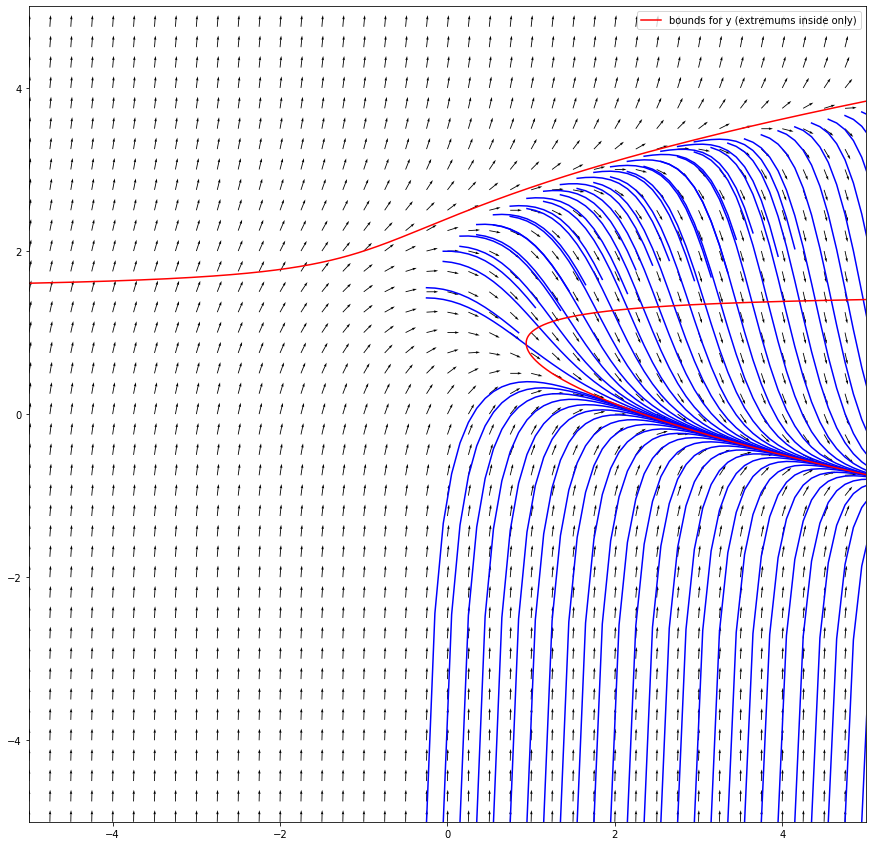

In [19]:
array = np.arange(-5, 5, 0.25)

# ------------------------------ будуємо поле напрямків -----------------------------
XX, YY = np.meshgrid(array, array)
UU = np.cos(np.arctan(task_f(XX, YY)))
VV = np.sin(np.arctan(task_f(XX, YY)))
fig = plt.figure(figsize=(15, 15))

plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.quiver(XX, YY, UU, VV, width=0.001)

# -------------------------- будуємо розв. між спеціальними точками -----------------------------
arr1 = np.arange(-0.25, 6, 0.2)  

arr2 = (2.85 + np.sqrt(1+4*arr1))/2  
for (x0, y0) in zip(arr1, arr2):    
    x = np.arange(x0, 6, 0.1)    
    plt.plot(x, odeint(task_f2, y0, x), color='b')

# ------------------------- будуємо розв. під спец. точками --------------------------------
arr1 = np.arange(-0.25, 5, 0.2)
# print(arr1)

for x0 in arr1:
    x = np.arange(x0, x0 + 3, 0.1)
    plt.plot(x, odeint(task_f2, -5, x), color='b')
    
# -------------------------- будуємо розв. над спец. точками -----------------------------
arr1 = np.arange(-0.25, 3, 0.2)

arr2 = (3.1 + np.sqrt(1+4*arr1))/2 
for (x0, y0) in zip(arr1, arr2):
    if x0 < -3:
        x = np.arange(x0, x0 + 0.8, 0.1)   
    else:
        x = np.arange(x0, x0 + 1.2, 0.1)
    plt.plot(x, odeint(task_f2, y0, x), color='b')
    



# -------------------------------- побудова графіків точок перегинів----------------------------------
y = np.arange(-1, 1.499, 0.001)
plt.plot(bound(y), y, color='red', label='bounds for y (extremums inside only)')

y = np.arange(1.501, 5, 0.001)
plt.plot(bound(y), y, color='red')

plt.legend(loc=1)
plt.show()